# 전처리가 끝난 상태

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
apt_price = pd.read_csv('apt_price.csv')
apt_price

,지역명,전용면적,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,60,2015,10,5652
2,서울,60~85,2015,10,5882
3,서울,85~102,2015,10,5721
4,서울,102~,2015,10,5879
...,...,...,...,...,...
6455,제주,모든면적,2022,1,6574
6456,제주,60,2022,1,2862
6457,제주,60~85,2022,1,6516
6458,제주,85~102,2022,1,5924


## 평수로 변경


In [40]:
apt_price['평당분양가격'] = apt_price['분양가격'] * 3.3

In [41]:
apt_price

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,60,2015,10,5652,18651.6
2,서울,60~85,2015,10,5882,19410.6
3,서울,85~102,2015,10,5721,18879.3
4,서울,102~,2015,10,5879,19400.7
...,...,...,...,...,...,...
6455,제주,모든면적,2022,1,6574,21694.2
6456,제주,60,2022,1,2862,9444.6
6457,제주,60~85,2022,1,6516,21502.8
6458,제주,85~102,2022,1,5924,19549.2


In [42]:
#[문제] 전용면적별 평당분양가격 평균과 합
apt_price.groupby('전용면적')['평당분양가격'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
전용면적,,,,,,,,
102~,1292.0,10957.7,5871.8,0.0,8494.2,10178.8,14199.9,32118.9
60,1292.0,10467.6,5167.4,0.0,7986.0,9414.9,12581.2,34824.9
60~85,1292.0,11019.6,4609.9,0.0,8111.4,10132.6,12662.1,35461.8
85~102,1292.0,9603.7,6898.8,0.0,7606.5,9477.6,12196.8,45655.5
모든면적,1292.0,11061.8,4554.4,0.0,8144.4,10221.8,12668.7,32943.9


In [43]:
g_area = apt_price.groupby('전용면적')

In [44]:
g_area.평당분양가격.agg(['max','min'])

,max,min
전용면적,,
102~,32118.9,0.0
60,34824.9,0.0
60~85,35461.8,0.0
85~102,45655.5,0.0
모든면적,32943.9,0.0


In [45]:
#평당분양가격, 분양가격 평균
g_area.agg({'평당분양가격':'mean','분양가격':'mean'}).round(1)

,평당분양가격,분양가격
전용면적,,
102~,10957.7,3320.5
60,10467.6,3172.0
60~85,11019.6,3339.3
85~102,9603.7,2910.2
모든면적,11061.8,3352.1


In [46]:
#평당분양가격의 평균, 평당분양가격의 합
g_area.평당분양가격.agg(['mean','sum']).round(1)
g_area.agg({'평당분양가격':['sum','mean']}).round(1)

평당분양가격         
               sum     mean
전용면적                       
102~    14157323.4  10957.7
60      13524188.7  10467.6
60~85   14237358.3  11019.6
85~102  12407927.4   9603.7
모든면적    14291844.6  11061.8

In [47]:
#평당분양가격의 평균, 평당분양가격의 합
g_area.agg({'평당분양가격':['sum','mean']}).columns

MultiIndex([('평당분양가격',  'sum'),
            ('평당분양가격', 'mean')],
           )

In [48]:
g_area.평당분양가격.agg(['mean','sum']).round(1).columns

Index(['mean', 'sum'], dtype='object')

In [49]:
#이름 지정 
g_area.평당분양가격.agg(**{'평당분양가격 평균':'mean','평당분양가격 합':'sum'})

,평당분양가격 평균,평당분양가격 합
전용면적,,
102~,10957.680650,14157323.4
60,10467.638313,13524188.7
60~85,11019.627167,14237358.3
85~102,9603.658978,12407927.4
모든면적,11061.799226,14291844.6


In [50]:
#문제 2 전용면적별 지역별 평당분양가격 평균
apt_price.groupby(['전용면적','지역명']).agg({'평당분양가격':'mean'}).round(1)

평당분양가격
전용면적 지역명         
102~ 강원    9760.7
     경기   15252.2
     경남    9504.0
     경북    9537.3
     광주   10475.2
...           ...
모든면적 전남    7963.2
     전북    7725.5
     제주   13529.9
     충남    8243.1
     충북    7586.4

[85 rows x 1 columns]

In [51]:
#문제 2 전용면적별 지역별 평당분양가격 평균
apt_price.groupby(['전용면적','지역명']).agg({'평당분양가격':'mean'}).unstack().round(1)

평당분양가격                                                                 
지역명         강원       경기       경남      경북       광주       대구       대전       부산   
전용면적                                                                           
102~    9760.7  15252.2   9504.0  9537.3  10475.2  14163.3   5871.7  13510.5  \
60      8378.7  13544.9   8854.5  8595.5   9711.1  12964.7   9253.5  12190.2   
60~85   8116.1  13101.3   9178.1  8678.9  10910.2  12972.8  10316.7  12597.7   
85~102  7640.8  14126.3  11392.4  7441.8   4726.1  11171.6   3224.9  12636.9   
모든면적    8159.3  13126.1   9217.2  8700.4  11020.6  12961.3  10365.0  12645.8   

                                                                             
지역명          서울      세종       울산       인천      전남      전북       제주      충남   
전용면적                                                                         
102~    23247.5  9745.6   5761.3  14507.0  9213.2  8564.8  10480.9  8181.7  \
60      25266.6  6890.3   8239.7  12358.7  7555.1  7916.2  10524.2  8205.9   
60~85   24586.8  9158.0  10241.4  12504.1  7964.1  7691.3  13417.0  8261.7   
85~102  27792.5  9201.9   3121.0  12942.2  7330.8  8121.1   5819.8  8248.0   
모든면적    24584.3  9607.5  10180.8  12434.1  7963.2  7725.5  13529.9  8243.1   

                
지역명         충북  
전용면적            
102~    8503.7  
60      7500.0  
60~85   7637.4  
85~102  8324.2  
모든면적    7586.4

In [52]:
#문제 2 전용면적별 지역별 평당분양가격 평균
apt_price.groupby(['전용면적','지역명']).agg({'평당분양가격':'mean'}).unstack().round(1).transpose()
apt_price.groupby(['전용면적','지역명']).agg({'평당분양가격':'mean'}).unstack().round(1).T

전용면적           102~       60    60~85   85~102     모든면적
       지역명                                             
평당분양가격 강원    9760.7   8378.7   8116.1   7640.8   8159.3
       경기   15252.2  13544.9  13101.3  14126.3  13126.1
       경남    9504.0   8854.5   9178.1  11392.4   9217.2
       경북    9537.3   8595.5   8678.9   7441.8   8700.4
       광주   10475.2   9711.1  10910.2   4726.1  11020.6
       대구   14163.3  12964.7  12972.8  11171.6  12961.3
       대전    5871.7   9253.5  10316.7   3224.9  10365.0
       부산   13510.5  12190.2  12597.7  12636.9  12645.8
       서울   23247.5  25266.6  24586.8  27792.5  24584.3
       세종    9745.6   6890.3   9158.0   9201.9   9607.5
       울산    5761.3   8239.7  10241.4   3121.0  10180.8
       인천   14507.0  12358.7  12504.1  12942.2  12434.1
       전남    9213.2   7555.1   7964.1   7330.8   7963.2
       전북    8564.8   7916.2   7691.3   8121.1   7725.5
       제주   10480.9  10524.2  13417.0   5819.8  13529.9
       충남    8181.7   8205.9   8261.7   8248.0   8243.1
       충북    8503.7   7500.0   7637.4   8324.2   7586.4

In [53]:
apt_price

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,60,2015,10,5652,18651.6
2,서울,60~85,2015,10,5882,19410.6
3,서울,85~102,2015,10,5721,18879.3
4,서울,102~,2015,10,5879,19400.7
...,...,...,...,...,...,...
6455,제주,모든면적,2022,1,6574,21694.2
6456,제주,60,2022,1,2862,9444.6
6457,제주,60~85,2022,1,6516,21502.8
6458,제주,85~102,2022,1,5924,19549.2


In [54]:
##지역명별 분양가격의 평균을 시각화

## 시각화

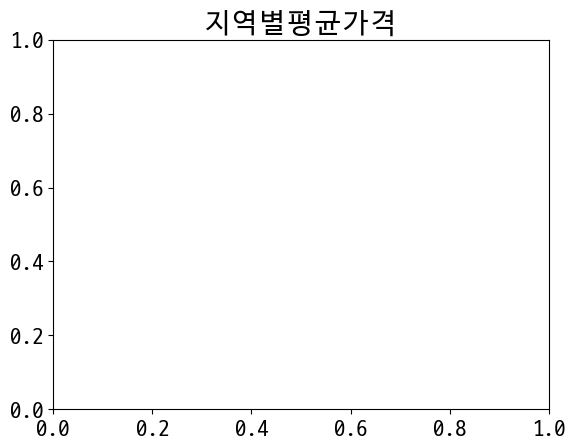

In [55]:
plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['axes.unicode_minus'] = False
apt_price.groupby('지역명').분양가격.mean()

plt.title('지역별평균가격')
plt.show()

In [56]:
g_local_name = apt_price.groupby('지역명')

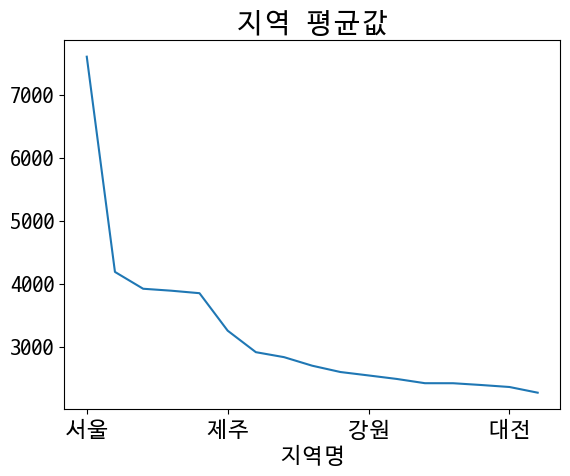

In [57]:
plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['axes.unicode_minus'] = False
g_local_name.분양가격.mean().sort_values(ascending=False).plot()
plt.title('지역 평균값')
plt.show()

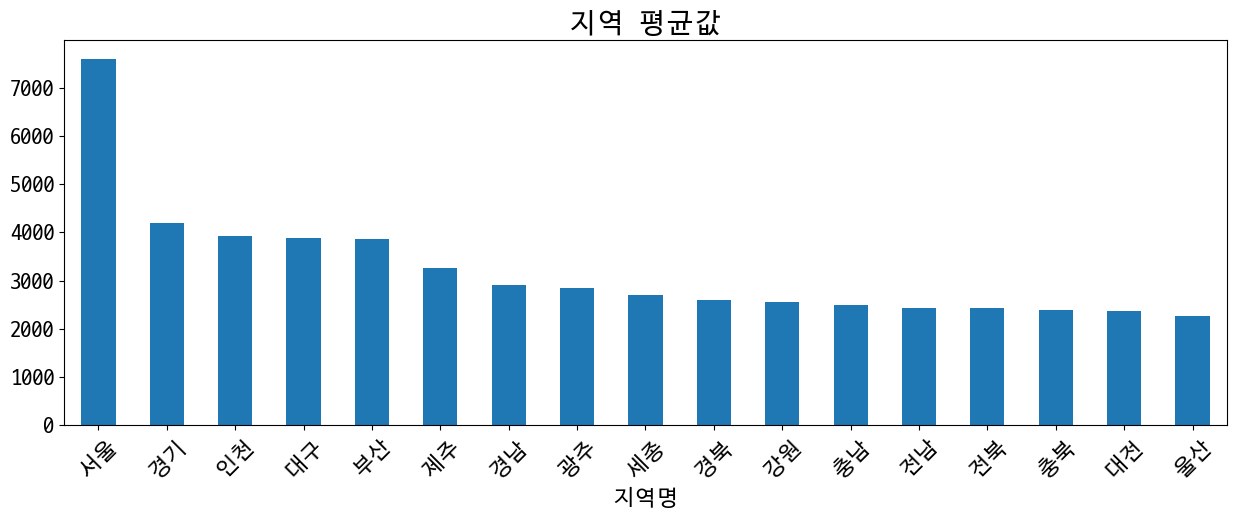

In [58]:
plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['axes.unicode_minus'] = False

g_local_name.분양가격.mean().sort_values(ascending=False).plot(
    kind = 'bar',
    rot=45,
    figsize=(15,5),
)

plt.title('지역 평균값')
plt.show()

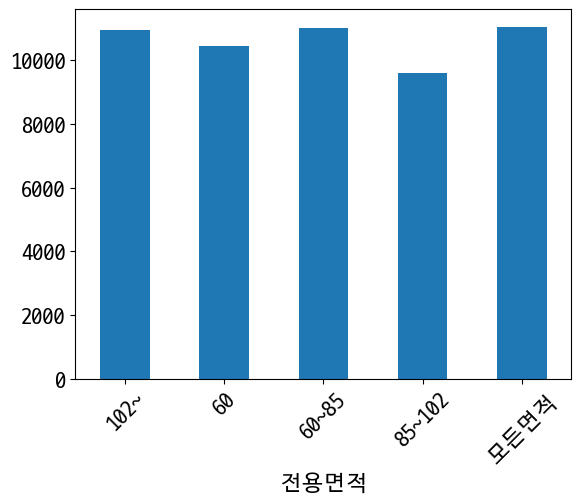

In [59]:
#전용 면적별 분양가격의 평균
g_area = apt_price.groupby('전용면적')
g_area.평당분양가격.mean().plot(
    kind='bar',
    rot=45
)

plt.show()

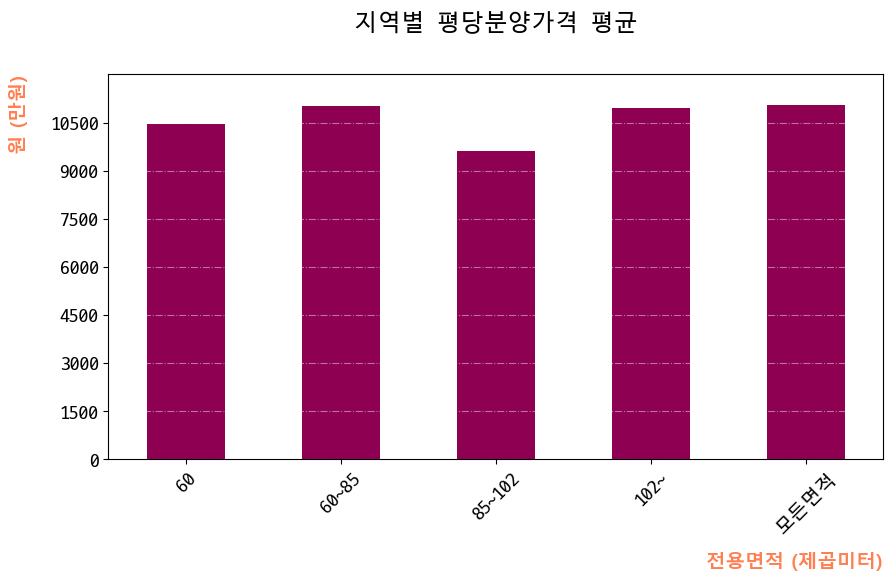

In [158]:
#전체 x,y title 라벨 크기
# plt.rc('font', size=16)
#title만
# plt.rc('axes', titlesize=20)
x_order=['60','60~85','85~102','102~','모든면적']
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])
g_area.평당분양가격.mean().loc[x_order].plot(
    kind='bar',
    rot=45,
    ylabel='만원',
    fontsize= 14,
    figsize=(10,5),
    colormap= 'PiYG',
#     title='??',
)
#타이틀 지정
plt.title('지역별 평당분양가격 평균',
#           fontsize=19, 
          pad=33, 
          loc='center',
         fontdict={'fontsize':17,'fontweight':'bold'},
         )
#x축레이블
lable_font = {
    'family':'Malgun Gothic',
    'color': 'Coral',
    'weight':'bold',
    'size':14
}
plt.xlabel('전용면적 (제곱미터)',
           labelpad=12,
           loc='right',
           fontdict=lable_font,
          )
#y축레이블
plt.ylabel('원 (만원)',
          labelpad= 15,
           loc = 'top',
           fontdict=lable_font,
          )
# 그리드 
plt.grid(True,
         axis='y',
         ls='-.',
         color='w',
         alpha=0.444444,
        )
# 축범위
# plt.xlim([xmin,xmax])
# plt.ylim([ymin,ymax])
plt.ylim([0,12000])
#눈금 xticks / yticks
# plt.xticks(range)
# plt.xticks([0,2,5])
# plt.xticks(np.arange(0,100,10))

plt.yticks(range(0,12000,1500))
plt.show()

In [61]:
help(apt_price.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |

In [155]:
apt_price

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,60,2015,10,5652,18651.6
2,서울,60~85,2015,10,5882,19410.6
3,서울,85~102,2015,10,5721,18879.3
4,서울,102~,2015,10,5879,19400.7
...,...,...,...,...,...,...
6455,제주,모든면적,2022,1,6574,21694.2
6456,제주,60,2022,1,2862,9444.6
6457,제주,60~85,2022,1,6516,21502.8
6458,제주,85~102,2022,1,5924,19549.2


# 가설

## 가설1 서울과 경기의 연도별 평당분양가 평균 지속해서 상승했을까??

In [287]:
g_local_year=apt_price.groupby(['지역명','연도']).평당분양가격.mean().unstack().astype(int)

In [289]:
g_local_year.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='지역명')

In [290]:
g_local_year.loc[['서울','경기']]

연도,2015,2016,2017,2018,2019,2020,2021,2022
지역명,,,,,,,,
서울,20315,21753,21864,23202,28286,29781,26442,30354
경기,11060,11684,12296,14258,15665,15106,14567,14970


In [298]:
g_local_year.loc[['서울','경기']].T

지역명,서울,경기
연도,,
2015,20315,11060
2016,21753,11684
2017,21864,12296
2018,23202,14258
2019,28286,15665
2020,29781,15106
2021,26442,14567
2022,30354,14970


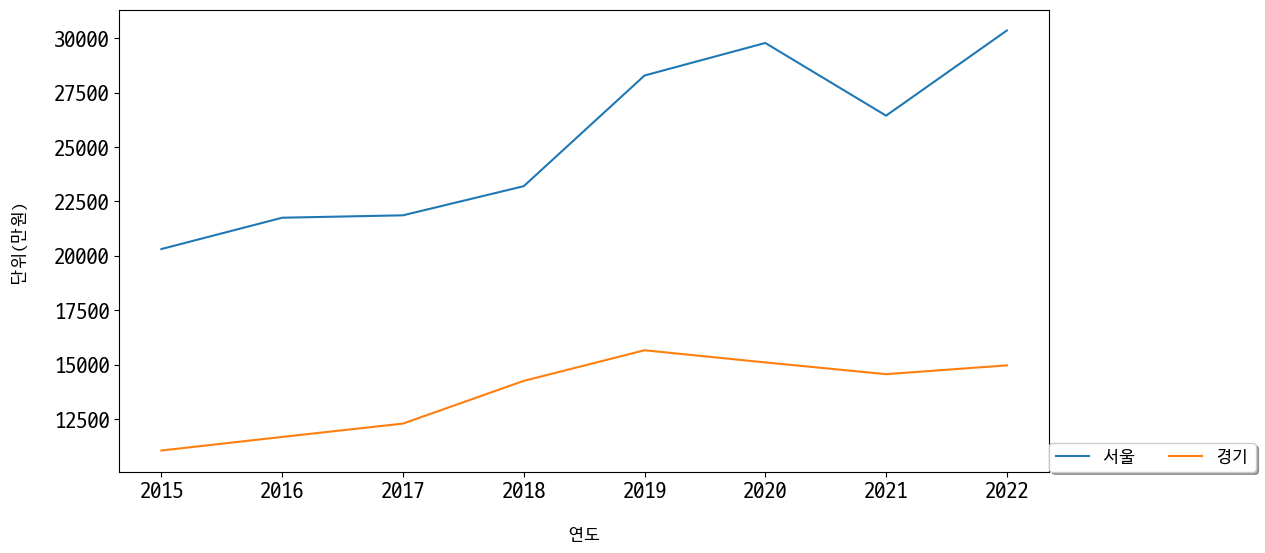

In [354]:
g_local_year.loc[['서울','경기']].T.plot(
    figsize=(12,6),
    ylabel='단위(만원)',
)
plt.xlabel('연도',labelpad=20,fontsize=12)
plt.ylabel('단위(만원)',labelpad=20,fontsize=12)

#범례를 바깥으로 뺼 수 있음.
plt.legend(loc=(1,0), ncols=2, fontsize=12,shadow=True)

In [355]:
#matplotlib를 먼저 설치 해줘여
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [356]:
import seaborn as sns

In [371]:
apt_price[(apt_price.지역명 =='서울')|(apt_price.지역명=='경기')].describe().mean()

연도         1609.031607
월           100.486677
분양가격       4951.645020
평당분양가격    16121.928567
dtype: float64

In [374]:
local_seoul_gyeonggi= apt_price[apt_price.지역명.isin(['서울','경기'])] #같은 데이터만 찾아요 포함으로 찾지 않아요

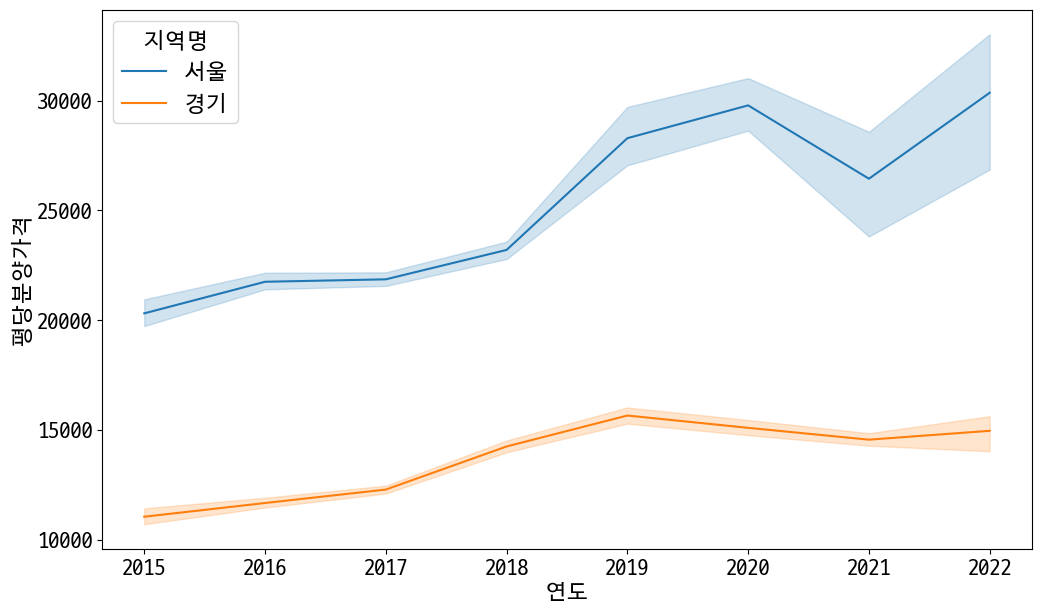

In [378]:
fig= sns.lineplot(local_seoul_gyeonggi, 
             x='연도', 
             y='평당분양가격',
            hue='지역명'
            )
fig.figure.set_size_inches(12,7)

<Axes: xlabel='연도', ylabel='평당분양가격'>

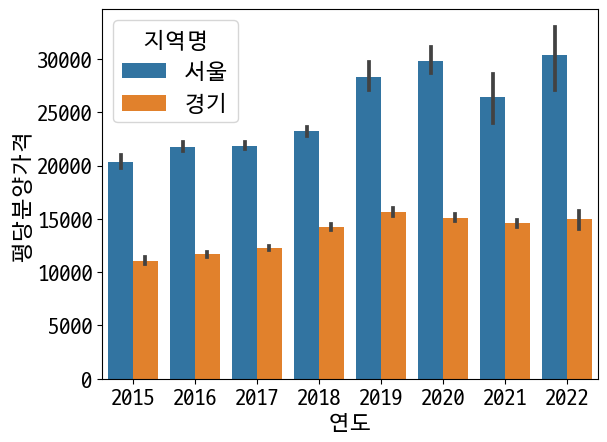

In [379]:
sns.barplot(local_seoul_gyeonggi, 
             x='연도', 
             y='평당분양가격',
            hue='지역명')